In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Bidirectional, TimeDistributed,GlobalMaxPool1D,Masking,GRU
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import json
from sklearn.model_selection import KFold
from keras.regularizers import l1,l2
from keras import regularizers

In [ ]:
with open('/content/drive/My Drive/max-labels-intense-selection.json', 'r') as file:
    data = json.load(file)
docs = ([x[0] for x in data])
labels = array([x[1] for x in data])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

# ------------------------------------------

# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1

# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

# pad documents to a max length of XXX words
max_length = 300
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

# load the whole embedding into memory
embeddings_index = dict()
f = open('/content/drive/My Drive/GoogleNews-vectors-negative300.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))


[[17, 705, 1512, 1901, 9, 180], [10523, 185, 501, 31, 755, 2, 639, 542], [17, 124, 125, 153, 32, 73, 11, 8, 76, 3291, 9, 14617, 122], [35, 1334, 769, 28, 221, 595, 166, 32], [335, 19, 7, 1760, 3, 77, 843, 229, 19, 7, 2384, 1, 1617, 13, 1074, 193], [75, 37, 8, 7, 1, 3690, 28, 1, 14618], [15, 41, 4, 5544, 5, 1283, 91, 2626, 5, 10524, 14619, 6, 5, 7095, 6, 1, 1153], [1, 2066, 6, 1, 2259, 7, 1, 115, 2, 6227, 13, 1, 2781, 3116, 1513, 6, 1, 1045, 2385], [20, 1, 543, 138, 2, 1514, 1003, 75, 1, 2067, 1515, 37, 1, 5545, 2, 1, 168, 6228, 4, 277, 2068], [278, 14620, 331, 65, 62, 4, 1075, 27, 40, 1618], [10, 3481, 1823, 6, 489, 206, 1, 844], [10, 183, 39, 2782, 4, 23, 8423], [6, 342, 88, 552, 1972, 1619, 29, 14621, 1154, 12, 28, 481, 22, 6, 67, 2386, 5, 438, 1824, 2, 5546, 124, 23, 514, 686, 1, 3691, 596, 1973, 1284, 82, 2, 11, 1285, 6, 252, 4, 3292, 27, 1, 7096, 1619, 1, 3692, 26, 10, 62, 3293, 27, 1, 5547, 3951, 29, 129, 10, 14622], [8, 326, 4, 985, 5, 2387, 137, 6, 1902, 7097, 736, 14623, 4, 17

In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 300))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Defining Model with Single Flatten and Dense Layer

In [ ]:
model = Sequential()
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          8664300   
_________________________________________________________________
flatten_2 (Flatten)          (None, 90000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 90001     
Total params: 8,754,301
Trainable params: 90,001
Non-trainable params: 8,664,300
_________________________________________________________________


In [ ]:
history = model.fit(padded_docs,labels,validation_split=0.2,epochs=10,batch_size=128)

Epoch 1/10
125/125 [==============================] - 5s 36ms/step - loss: 0.5224 - accuracy: 0.7539 - val_loss: 0.5087 - val_accuracy: 0.7602
Epoch 2/10
125/125 [==============================] - 4s 33ms/step - loss: 0.4796 - accuracy: 0.7704 - val_loss: 0.5060 - val_accuracy: 0.7648
Epoch 3/10
125/125 [==============================] - 4s 28ms/step - loss: 0.4564 - accuracy: 0.7814 - val_loss: 0.5051 - val_accuracy: 0.7657
Epoch 4/10
125/125 [==============================] - 4s 28ms/step - loss: 0.4387 - accuracy: 0.7923 - val_loss: 0.5081 - val_accuracy: 0.7680
Epoch 5/10
125/125 [==============================] - 4s 33ms/step - loss: 0.4244 - accuracy: 0.8016 - val_loss: 0.5102 - val_accuracy: 0.7667
Epoch 6/10
125/125 [==============================] - 4s 30ms/step - loss: 0.4120 - accuracy: 0.8103 - val_loss: 0.5154 - val_accuracy: 0.7663
Epoch 7/10
125/125 [==============================] - 4s 30ms/step - loss: 0.4009 - accuracy: 0.8172 - val_loss: 0.5204 - val_accuracy: 0.7648

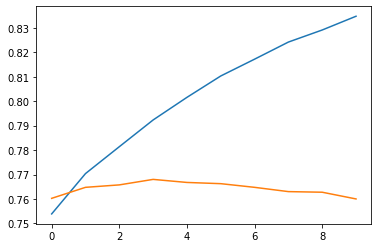

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(padded_docs, labels)
print('Accuracy: %f' % (accuracy*100))

625/625 [==============================] - 5s 7ms/step - loss: 0.3962 - accuracy: 0.8303
Accuracy: 83.029997


Model with Two Flatten and Dense Layers

In [ ]:
# define model
model = Sequential()
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          8664300   
_________________________________________________________________
flatten (Flatten)            (None, 90000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 90001     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 8,754,303
Trainable params: 90,003
Non-trainable params: 8,664,300
_________________________________________________________________


In [ ]:
history = model.fit(padded_docs,labels,validation_split=0.2,epochs=10,batch_size=128)

Epoch 1/10
125/125 [==============================] - 4s 32ms/step - loss: 0.6320 - accuracy: 0.6638 - val_loss: 0.5991 - val_accuracy: 0.7538
Epoch 2/10
125/125 [==============================] - 4s 36ms/step - loss: 0.5963 - accuracy: 0.7536 - val_loss: 0.5838 - val_accuracy: 0.7607
Epoch 3/10
125/125 [==============================] - 4s 32ms/step - loss: 0.5782 - accuracy: 0.7626 - val_loss: 0.5708 - val_accuracy: 0.7623
Epoch 4/10
125/125 [==============================] - 4s 35ms/step - loss: 0.5622 - accuracy: 0.7699 - val_loss: 0.5612 - val_accuracy: 0.7625
Epoch 5/10
125/125 [==============================] - 4s 33ms/step - loss: 0.5479 - accuracy: 0.7753 - val_loss: 0.5533 - val_accuracy: 0.7628
Epoch 6/10
125/125 [==============================] - 4s 36ms/step - loss: 0.5348 - accuracy: 0.7835 - val_loss: 0.5465 - val_accuracy: 0.7653
Epoch 7/10
125/125 [==============================] - 4s 35ms/step - loss: 0.5225 - accuracy: 0.7922 - val_loss: 0.5405 - val_accuracy: 0.7688

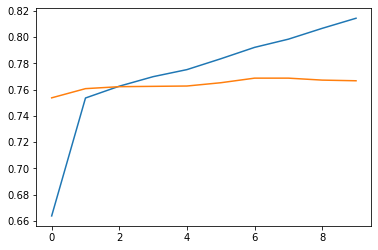

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(padded_docs, labels)
print('Accuracy: %f' % (accuracy*100))

625/625 [==============================] - 4s 7ms/step - loss: 0.4925 - accuracy: 0.8088
Accuracy: 80.884999


LSTM

In [ ]:
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)
model.add(e)
model.add(LSTM(300, return_sequences=True, dropout=0.2))
model.add(GlobalMaxPool1D())
model.add(Dense(300, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 300, 300)          8664300   
_________________________________________________________________
flatten_1 (Flatten)          (None, 90000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 90001     
_________________________________________________________________
embedding_7 (Embedding)      (None, 1, 300)            8664300   
_________________________________________________________________
bidirectional_9 (Bidirection (None, 1, 600)            1442400   
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 600)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)              

In [ ]:
history = model.fit(padded_docs,labels,validation_split=0.2,epochs=10,batch_size=128)

Epoch 1/10
125/125 [==============================] - 9s 75ms/step - loss: 0.6931 - accuracy: 0.5018 - val_loss: 0.6933 - val_accuracy: 0.4843
Epoch 2/10
125/125 [==============================] - 8s 67ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6934 - val_accuracy: 0.4843
Epoch 3/10
125/125 [==============================] - 8s 67ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6935 - val_accuracy: 0.4843
Epoch 4/10
125/125 [==============================] - 8s 67ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6934 - val_accuracy: 0.4843
Epoch 5/10
125/125 [==============================] - 8s 66ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6934 - val_accuracy: 0.4843
Epoch 6/10
125/125 [==============================] - 8s 65ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6934 - val_accuracy: 0.4843
Epoch 7/10
125/125 [==============================] - 8s 65ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6934 - val_accuracy: 0.4843

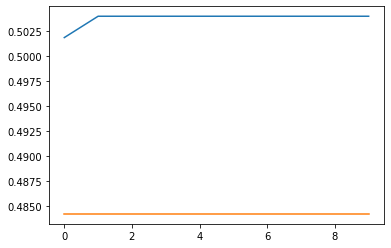

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()

Bi-Directional LSTM

In [ ]:
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)
model.add(e)
model.add(Bidirectional(LSTM(300, return_sequences=True, dropout=0.2)))
model.add(GlobalMaxPool1D())
model.add(Dense(300, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 300, 300)          8664300   
_________________________________________________________________
flatten_1 (Flatten)          (None, 90000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 90001     
_________________________________________________________________
embedding_7 (Embedding)      (None, 1, 300)            8664300   
_________________________________________________________________
bidirectional_9 (Bidirection (None, 1, 600)            1442400   
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 600)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)              

In [ ]:
history = model.fit(padded_docs,labels,validation_split=0.2,epochs=10,batch_size=128)

Epoch 1/10
125/125 [==============================] - 9s 69ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6934 - val_accuracy: 0.4843
Epoch 2/10
125/125 [==============================] - 9s 70ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6934 - val_accuracy: 0.4843
Epoch 3/10
125/125 [==============================] - 9s 69ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6935 - val_accuracy: 0.4843
Epoch 4/10
125/125 [==============================] - 9s 70ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6935 - val_accuracy: 0.4843
Epoch 5/10
125/125 [==============================] - 9s 70ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6934 - val_accuracy: 0.4843
Epoch 6/10
125/125 [==============================] - 9s 69ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6935 - val_accuracy: 0.4843
Epoch 7/10
125/125 [==============================] - 9s 70ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6934 - val_accuracy: 0.4843

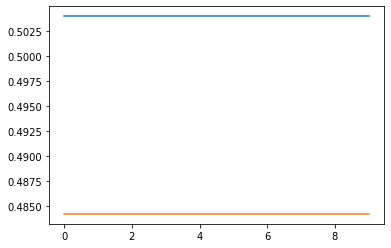

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(padded_docs, labels)
print('Accuracy: %f' % (accuracy*100))

625/625 [==============================] - 10s 15ms/step - loss: 0.6932 - accuracy: 0.5000
Accuracy: 50.000000



GRU

In [ ]:
model = Sequential()
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)
model.add(e)
model.add(GRU(units=300, return_sequences=True, dropout=0.2))
model.add(Dense(300, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 300, 300)          8664300   
_________________________________________________________________
gru (GRU)                    (None, 300, 300)          541800    
_________________________________________________________________
dense_10 (Dense)             (None, 300, 300)          90300     
_________________________________________________________________
dropout_4 (Dropout)          (None, 300, 300)          0         
_________________________________________________________________
dense_11 (Dense)             (None, 300, 1)            301       
Total params: 9,296,701
Trainable params: 632,401
Non-trainable params: 8,664,300
_________________________________________________________________


In [ ]:
history = model.fit(padded_docs,labels,validation_split=0.2,epochs=10,batch_size=128)

Epoch 1/10
125/125 [==============================] - 483s 4s/step - loss: 0.7063 - accuracy: 0.5298 - val_loss: 0.6606 - val_accuracy: 0.5940
Epoch 2/10
125/125 [==============================] - 486s 4s/step - loss: 0.6688 - accuracy: 0.6097 - val_loss: 0.6247 - val_accuracy: 0.6957
Epoch 3/10
125/125 [==============================] - 487s 4s/step - loss: 0.6502 - accuracy: 0.6031 - val_loss: 0.5883 - val_accuracy: 0.7008
Epoch 4/10
125/125 [==============================] - 475s 4s/step - loss: 0.5934 - accuracy: 0.6926 - val_loss: 0.5630 - val_accuracy: 0.7311
Epoch 5/10
125/125 [==============================] - 482s 4s/step - loss: 0.5506 - accuracy: 0.7283 - val_loss: 0.5514 - val_accuracy: 0.7377
Epoch 6/10
125/125 [==============================] - 480s 4s/step - loss: 0.5390 - accuracy: 0.7408 - val_loss: 0.5257 - val_accuracy: 0.7552
Epoch 7/10
125/125 [==============================] - 474s 4s/step - loss: 0.5194 - accuracy: 0.7509 - val_loss: 0.5140 - val_accuracy: 0.7519

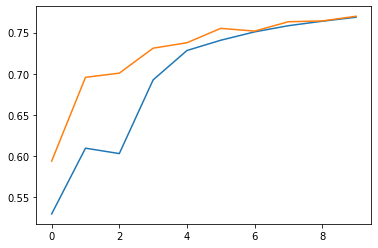

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(padded_docs, labels)
print('Accuracy: %f' % (accuracy*100))

625/625 [==============================] - 268s 429ms/step - loss: 0.4749 - accuracy: 0.7817
Accuracy: 78.170574
